# Anomaly detection example functions

In [1]:
import numpy as np
import pandas as pd
import models
import utils
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/Data.csv', sep=';')
data = pd.DataFrame(data[['Time', 'x013']])
data.iloc[:, 1]

0       49.2
1       49.2
2       49.1
3       49.1
4       49.1
        ... 
6606    50.6
6607    50.6
6608    50.6
6609    50.7
6610    50.7
Name: x013, Length: 6611, dtype: float64

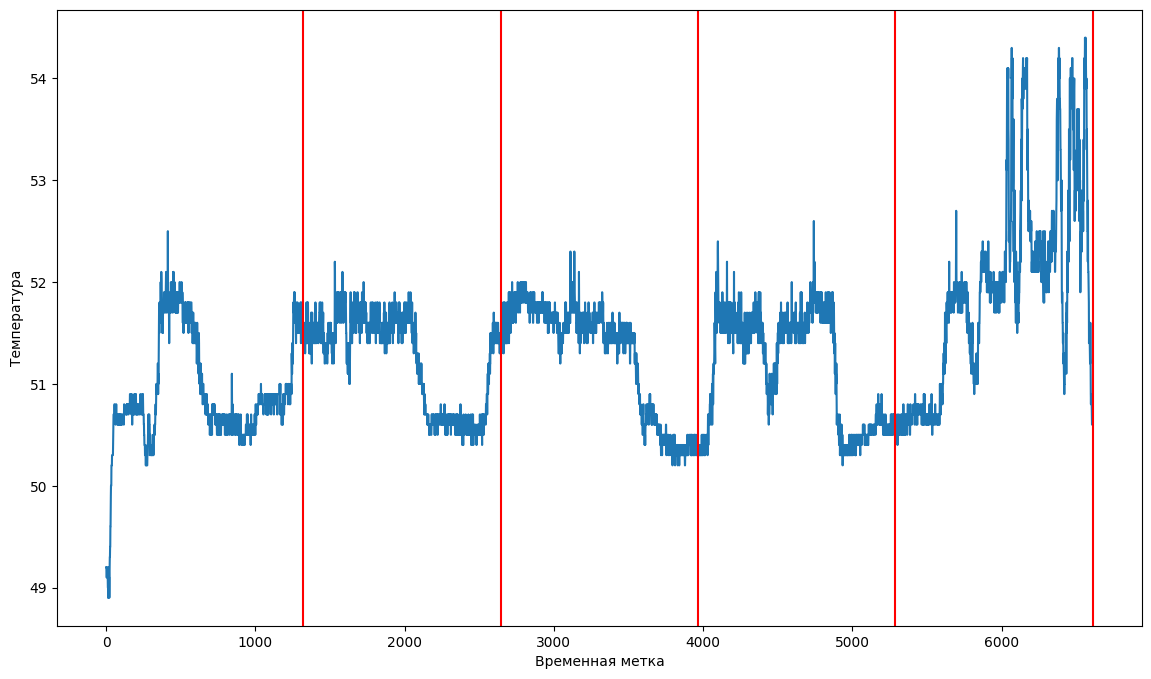

In [5]:
plt.figure(figsize=(14, 8))
n = 5
k = np.cumsum([int(len(data.iloc[:, 1])/n) for i in range(n)])
plt.plot(data.iloc[:, 1])
[plt.axvline(k[i], color='red') for i in range(len(k))]
plt.xlabel('Временная метка')
plt.ylabel('Температура')
plt.show()

## Const std model:

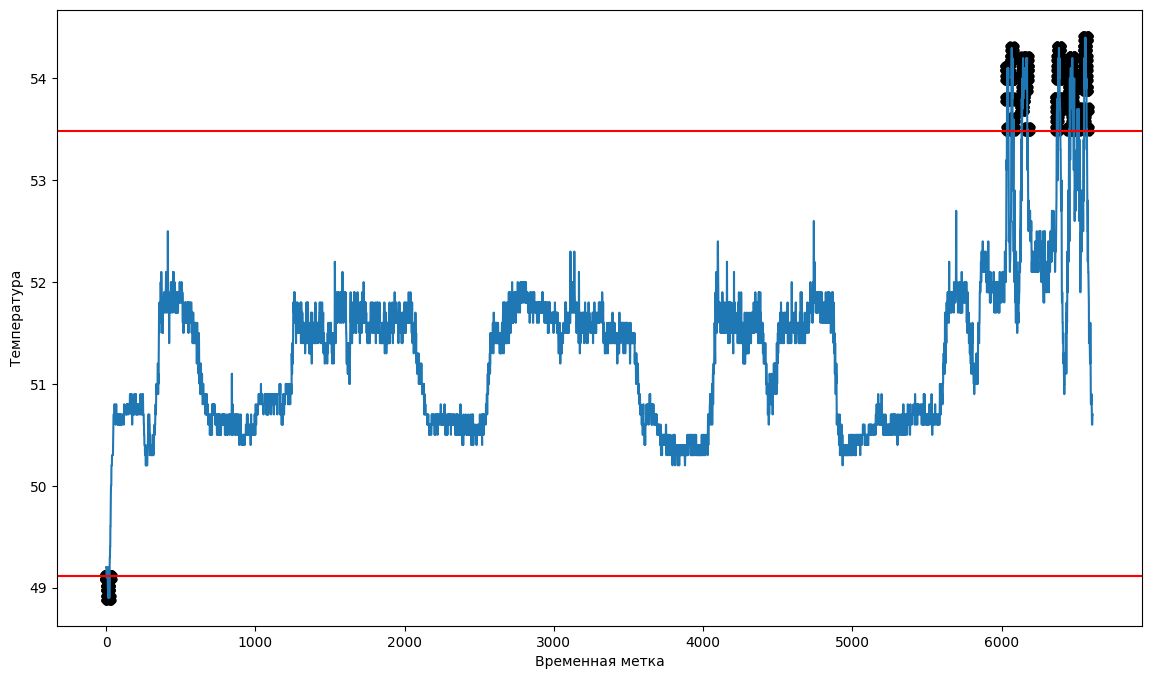

In [6]:
anomalies, bounds = models.std_model(data=data.iloc[:, 1],
                                            threshold=3,
                                            roll=False)

utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies,
                     bounds=bounds)

# Roll std model:

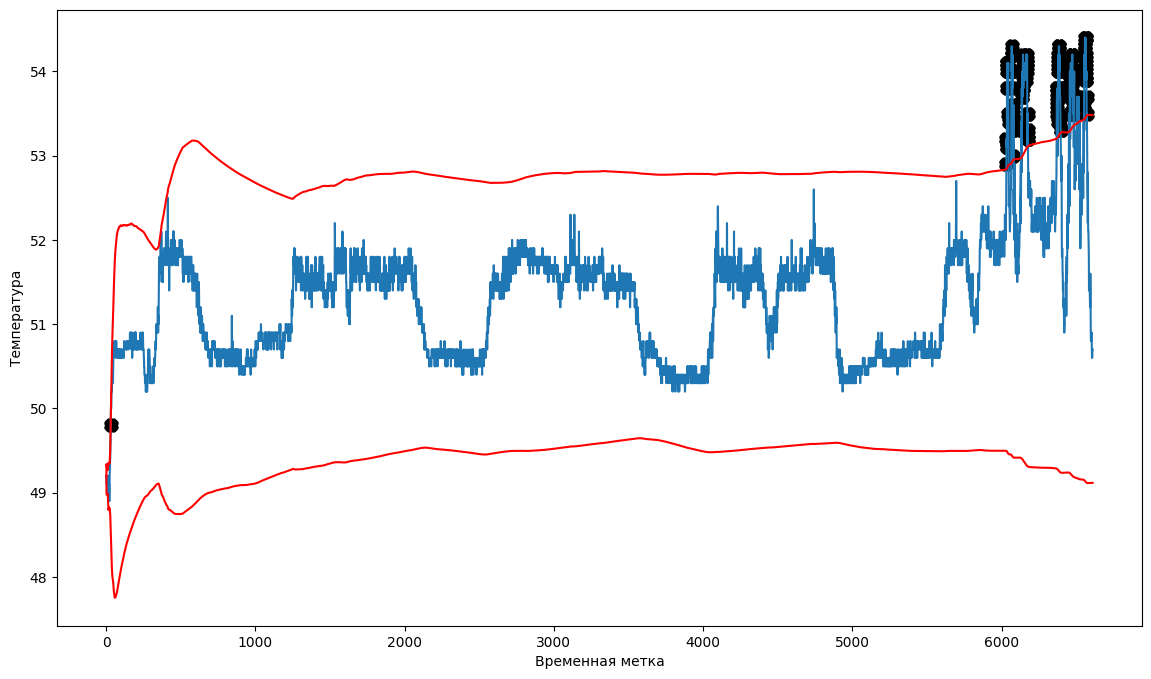

In [5]:
# as data param needs pd.Series

anomalies, bounds = models.std_model(data=data.iloc[:, 1],
                                            threshold=3,
                                            roll=True)

utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies,
                     bounds=bounds)

## Const IQR model:

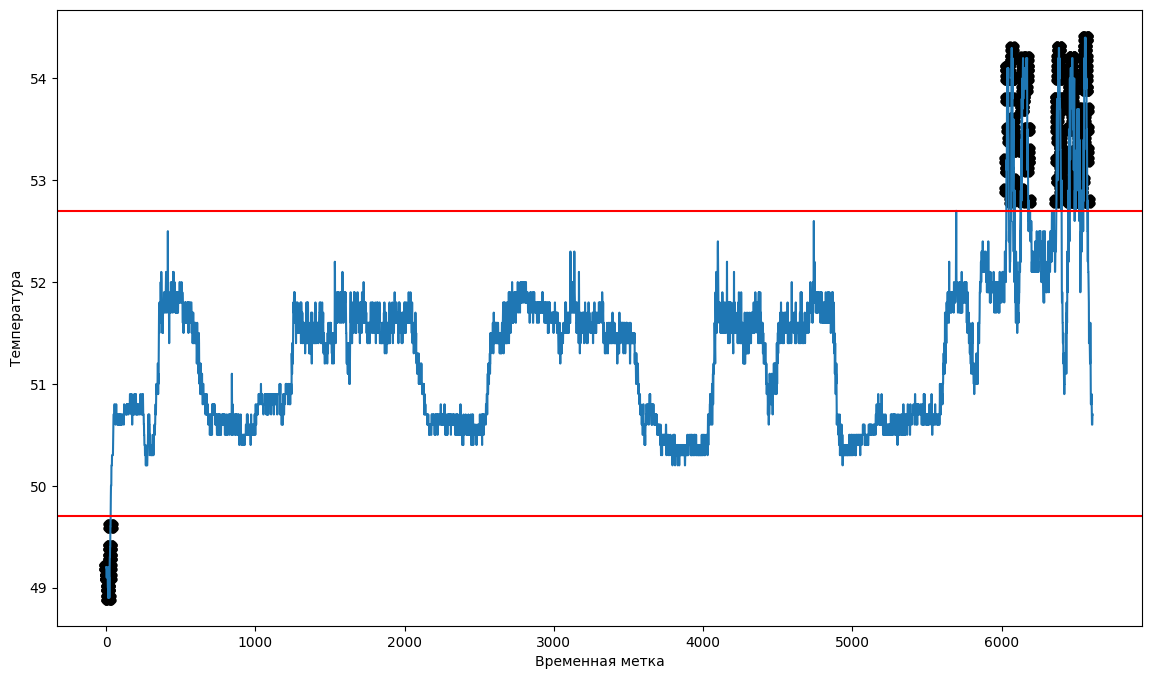

In [5]:
anomalies, bounds = models.iqr_model(data=data.iloc[:, 1],
                                     threshold=1,
                                     roll=False)
utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies,
                     bounds=bounds)

# Roll IQR model:

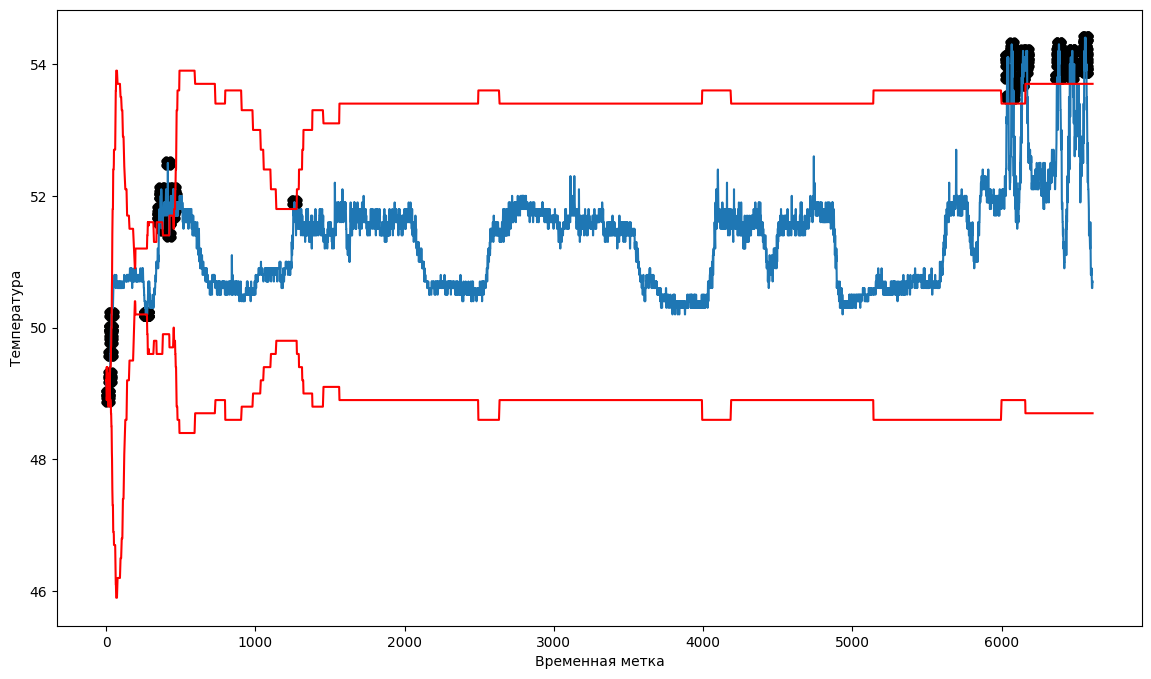

In [7]:
anomalies, bounds = models.iqr_model(data=data.iloc[:, 1],
                                     threshold=2,
                                     roll=True)
utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies,
                     bounds=bounds)

## LSTM anomaly detection model:

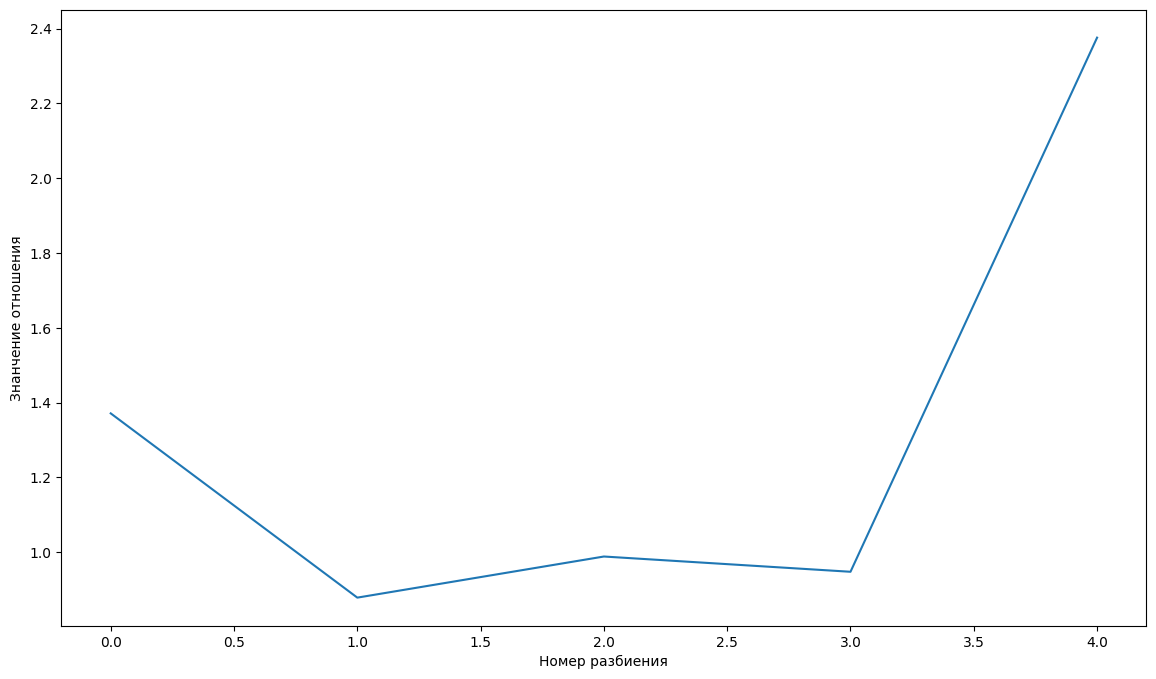

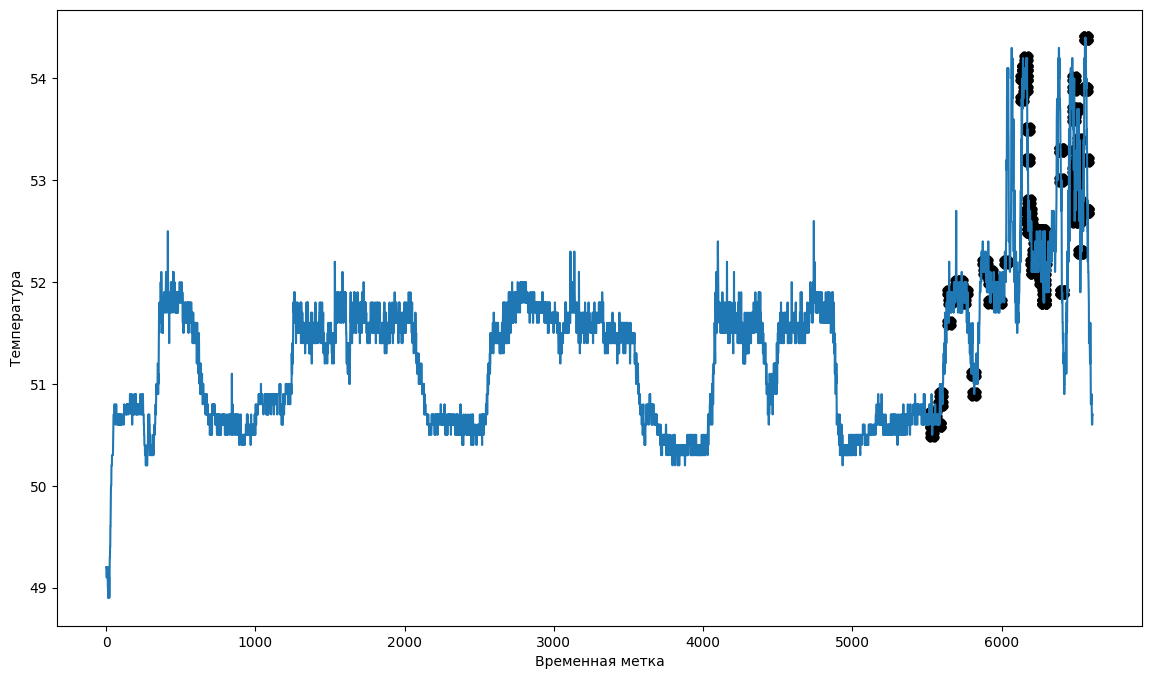

In [4]:
model = models.ModelLSTM(1, 2, 1)

anomaly_lstm = models.AnomalyLSTM(nn_model=model,
                                  data=data,
                                  thr_model=models.std_model,
                                  num_epochs=5,
                                  n_splits=5,
                                  threshold=1.5,
                                  plot=False,
                                  all_outputs=False,
                                  show_print=False)

anomalies = anomaly_lstm.anomalies

utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies)

## SBERP close price example:

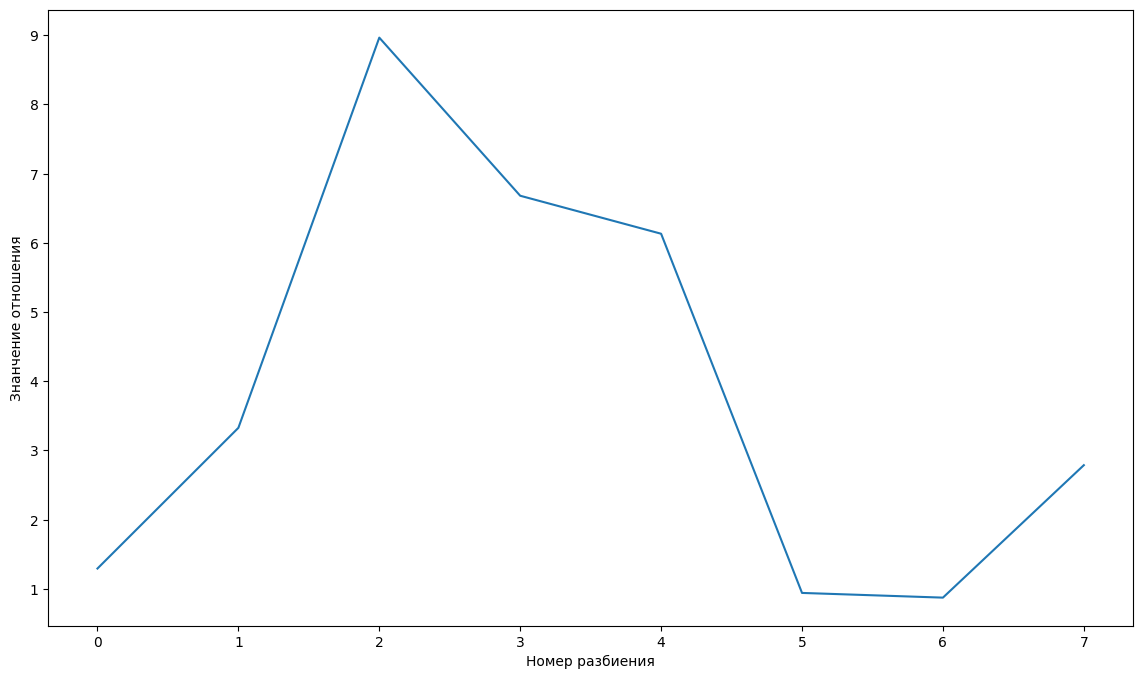

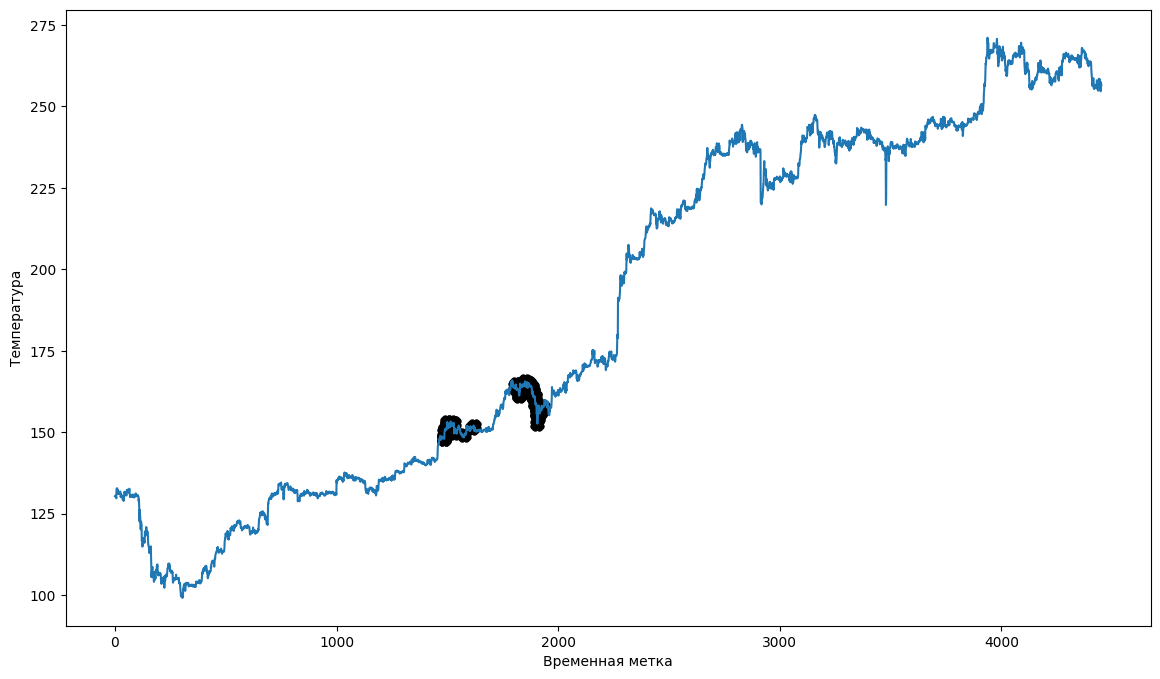

In [5]:
data = pd.read_csv('data/close_portfolio.csv')

data.columns = ['Time', 'SBERP']

an = models.AnomalyLSTM(data=data, 
                        nn_model=models.ModelLSTM(1, 1, 1), 
                        n_splits=8,
                        num_epochs=15,
                        threshold=1, 
                        all_outputs=True, 
                        plot=False, 
                        show_print=False)

utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=an.anomalies)

In [10]:
import torch
torch.__version__

'2.0.1+cpu'

In [11]:
pd.__version__

'2.1.1'

In [12]:
np.__version__

'1.23.5'